In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the images

In [9]:
image_path = []

for root,dirs,files in os.walk('/content/drive/MyDrive/Colab Notebooks/Human-Segmentation-Data/Training_Images'):
    for file in sorted(files):
        path = os.path.join(root,file)
        image_path.append(path)

In [10]:
len(image_path)

291

In [11]:
mask_path = []

for root,dirs,files in os.walk('/content/drive/MyDrive/Colab Notebooks/Human-Segmentation-Data/Ground_Truth'):
    for file in sorted(files):
        path = os.path.join(root,file)
        mask_path.append(path)

In [12]:
len(mask_path)

291

In [13]:
path.split('/')[-1].strip('.png')

'99'

In [14]:
images = []
error_files = []
for path in tqdm(image_path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)
        images.append(img)
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image : {path}")
        error_files.append(path.split('/')[-1].strip('.jpg'))
        continue

  0%|          | 1/291 [00:00<03:42,  1.30it/s]

Error decoding image : /content/drive/MyDrive/Colab Notebooks/Human-Segmentation-Data/Training_Images/.DS_Store


100%|██████████| 291/291 [00:08<00:00, 33.94it/s]


In [15]:
len(error_files)

1

In [16]:
masks = []

for path in tqdm(mask_path):
    try:
        if(path.split('/')[-1].strip('.png') in error_files):
            continue
        msk = tf.io.read_file(path)
        msk = tf.image.decode_image(msk, channels=1, dtype=tf.uint8)
        masks.append(msk)
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image : {path}")
        continue

100%|██████████| 291/291 [03:33<00:00,  1.37it/s]


In [17]:
len(images)

290

## Split 30 Images to Test set

In [18]:
test_images = images[220: ]
test_masks = masks[220: ]

(np.float64(-0.5), np.float64(317.5), np.float64(158.5), np.float64(-0.5))

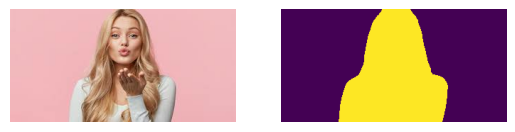

In [19]:
plt.subplot(1,2,1)
plt.imshow(test_images[0])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(test_masks[0])
plt.axis(False)

In [20]:
len(masks)

290

In [21]:
masks[0]

<tf.Tensor: shape=(183, 276, 1), dtype=uint8, numpy=
array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)>

In [22]:
images = images[:220]
masks = masks[:220]

## Visualize a few images

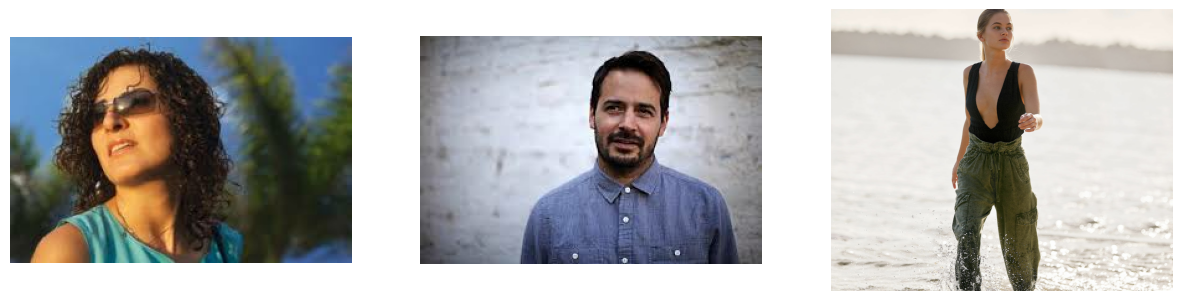

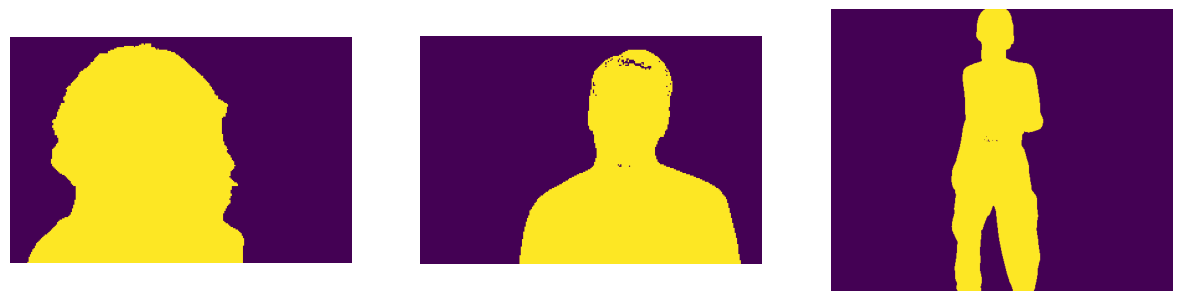

In [23]:
plt.figure(figsize = (15,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(np.squeeze(images[i]))
    plt.axis(False)

plt.figure(figsize = (15,6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(masks[i])
    plt.axis(False)

## Data Preprocessing

### Resize images

In [24]:
def resize_image(image):
    image = np.squeeze(image)
    image = tf.cast(image, dtype = tf.float32)
    image = image/255.
    image = tf.image.resize(image, (128,128))
    return image

In [25]:
def resize_mask(mask):
    mask = tf.cast(mask, dtype = tf.float32)
    mask = mask/255.
    mask = tf.image.resize(mask, (128,128))
    return mask

In [26]:
X = [resize_image(i) for i in images]
y = [resize_mask(i) for i in masks]

In [27]:
len(X), len(y)

(220, 220)

# Method 1 : Without Data Augmentation

### Split into train-val dataset

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25, random_state=0)

print('X_train: ', len(X_train))
print('X_val: ', len(X_val))
print('y_train: ', len(y_train))
print('y_val: ', len(y_val))

X_train:  165
X_val:  55
y_train:  165
y_val:  55


In [29]:
X_train[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.18039216, 0.09411765, 0.03921569],
        [0.18039216, 0.09411765, 0.03921569],
        [0.17393525, 0.08766073, 0.03275876],
        ...,
        [0.78380823, 0.44263175, 0.        ],
        [0.7536718 , 0.40857378, 0.        ],
        [0.7216468 , 0.38431528, 0.        ]],

       [[0.18039216, 0.09411765, 0.03921569],
        [0.18212184, 0.09584734, 0.04094537],
        [0.17735907, 0.09108456, 0.0361826 ],
        ...,
        [0.77685356, 0.43567708, 0.        ],
        [0.7636183 , 0.4185202 , 0.00283395],
        [0.72075677, 0.38342527, 0.        ]],

       [[0.18199307, 0.09571857, 0.04473817],
        [0.1764706 , 0.09019608, 0.03921569],
        [0.1764706 , 0.09019608, 0.03921569],
        ...,
        [0.77709866, 0.4359222 , 0.        ],
        [0.7529412 , 0.41459864, 0.        ],
        [0.71322   , 0.37814033, 0.        ]],

       ...,

       [[0.03694853, 0.02910539, 0.03302696],
        [0.03

In [30]:
y_train[0]

<tf.Tensor: shape=(128, 128, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

### Convert List to Tensor

In [31]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

In [33]:
X_train.element_spec, X_val.element_spec, y_train.element_spec, y_val.element_spec

(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None))

In [34]:
train = tf.data.Dataset.zip(X_train, y_train)
val = tf.data.Dataset.zip(X_val, y_val)

In [35]:
type(train)

tensorflow.python.data.ops.zip_op._ZipDataset

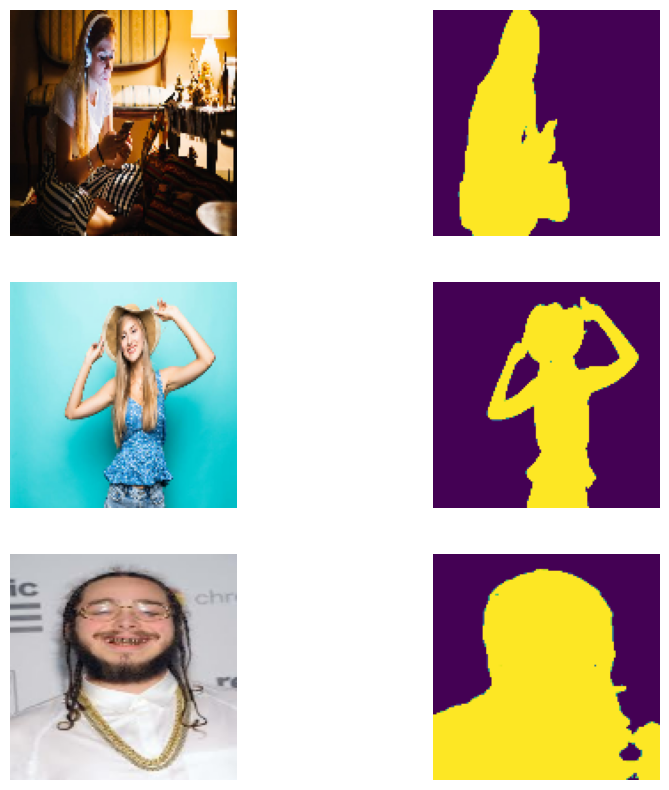

In [36]:
i = 0
plt.figure(figsize=(10,10))
for img, mask in train.take(3):
    plt.subplot(3,2,i+1)
    plt.imshow(img)
    i+=1
    plt.axis(False)

    plt.subplot(3,2,i+1)
    plt.imshow(mask)
    i+=1
    plt.axis(False)

In [37]:
size = tf.data.experimental.cardinality(train)
size.numpy()

np.int64(165)

## Convert `tensorflow.python.data.ops.zip_op._ZipDataset` to `np.array`

In [38]:
sample = list(train.as_numpy_iterator())
img = []
msk = []
for i,j in sample:
    img.append(i)
    msk.append(j)

In [39]:
img = np.array(img)

In [40]:
img.shape

(165, 128, 128, 3)

In [41]:
len(img)

165

In [42]:
msk = np.array(msk)

In [43]:
msk.shape

(165, 128, 128, 1)

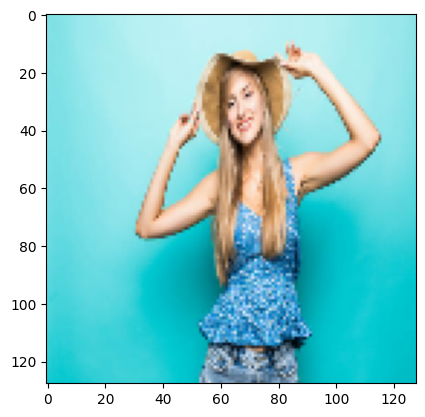

In [44]:
plt.imshow(img[1])

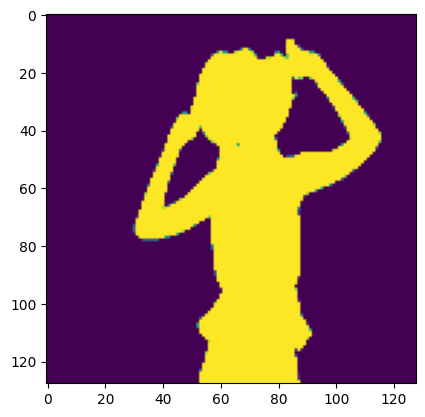

In [45]:
plt.imshow(msk[1])

In [46]:
sample = list(val.as_numpy_iterator())
val_img = []
val_msk = []
for i,j in sample:
    val_img.append(i)
    val_msk.append(j)

In [47]:
val_img = np.array(val_img)
val_img.shape

(55, 128, 128, 3)

In [48]:
val_msk = np.array(val_msk)
val_msk.shape

(55, 128, 128, 1)

# Using UNET Model

In [49]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input,UpSampling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import backend as keras

In [60]:
def unet(input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512,2,strides=(2,2),padding='same')(drop5)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(256,2,strides=(2,2),padding='same')(conv6)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(128,2,strides=(2,2),padding='same')(conv7)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2DTranspose(64,2,strides=(2,2),padding='same')(conv8)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [61]:
model = unet()

In [62]:
len(X_train)

165

In [63]:
len(X_val)

55

In [64]:
history = model.fit(img,
          msk,
          batch_size = 16,
          epochs=25,
          validation_data=(val_img,val_msk))

Epoch 1/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6452 - loss: 0.6509 - val_accuracy: 0.7517 - val_loss: 0.5339
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.7411 - loss: 0.5525 - val_accuracy: 0.7577 - val_loss: 0.5149
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.7532 - loss: 0.5029 - val_accuracy: 0.7668 - val_loss: 0.4760
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.7731 - loss: 0.4522 - val_accuracy: 0.7593 - val_loss: 0.4842
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.7437 - loss: 0.4963 - val_accuracy: 0.7525 - val_loss: 0.4557
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.7470 - loss: 0.4518 - val_accuracy: 0.7524 - val_loss: 0.4824
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.7425 - loss: 0.4646 - val_accuracy: 0.7525 - val_loss: 0.4488
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.7594 - loss: 0.4311 - val_accuracy: 0.75

In [6]:
model.save('/content/drive/MyDrive/Colab Notebooks/Human-Segmentation-Data/model.keras')


NameError: name 'model' is not defined

In [50]:
train_loss ,train_acc = model.evaluate(img,msk)
val_loss ,val_acc = model.evaluate(val_img,val_msk)
print("Training loss = %.2f" % train_loss)
print("Training accuracy = %.2f "% train_acc)

print("Validation loss = %.2f "%val_loss)
print("Validation accuracy = %.2f "% val_acc)

NameError: name 'model' is not defined

##Graphs

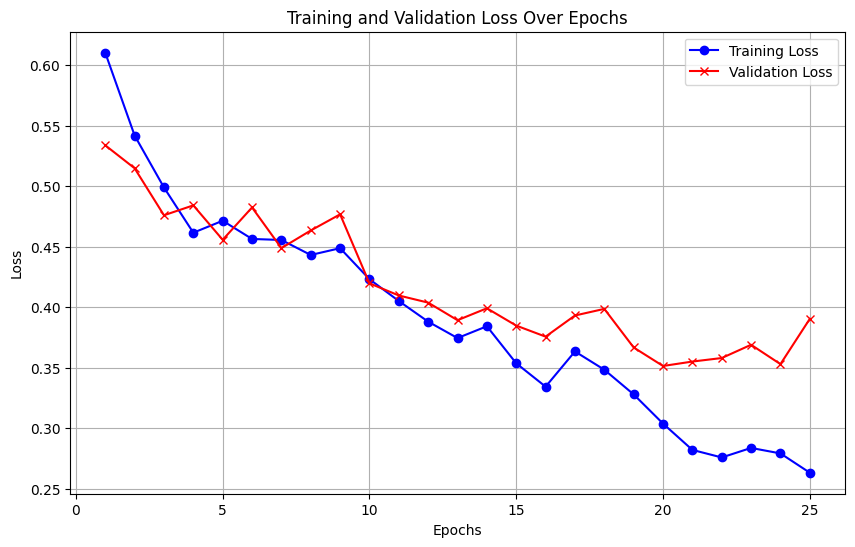

In [67]:
# Train the model and store the histor

# Extract the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='red', marker='x')

plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Predict for test images

In [7]:
model_s = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Human-Segmentation-Data/model.keras')

In [51]:
test_img = [resize_image(i) for i in test_images]
test_img = np.array(test_img)
test_img.shape

(70, 128, 128, 3)

In [52]:
test_msk = [resize_mask(i) for i in test_masks]
test_msk = np.array(test_msk)
test_msk.shape

(70, 128, 128, 1)

In [53]:
y_pred = model_s.predict(test_img)

3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step


In [54]:
y_pred.shape

(70, 128, 128, 1)

## Visualizing the predictions

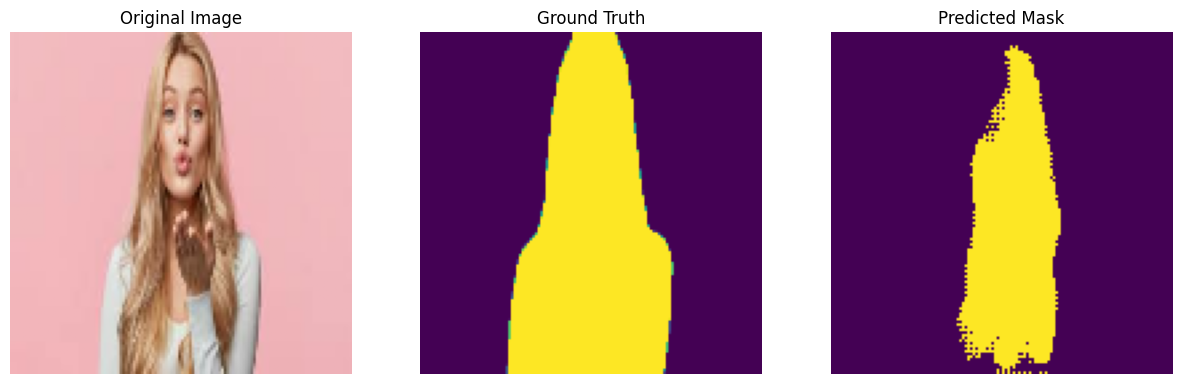

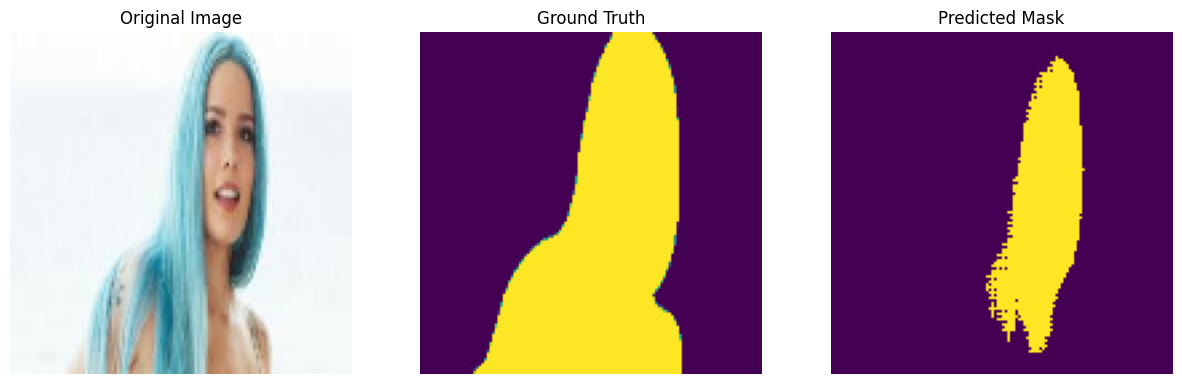

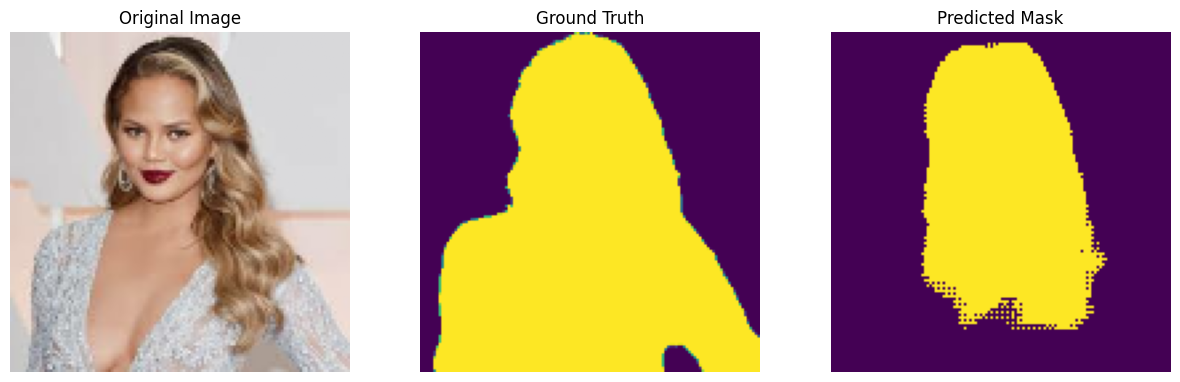

In [55]:
for i in range(3):

    plt.figure(figsize=(15,15))

    plt.subplot(i+1,3,1)
    plt.title("Original Image")
    plt.imshow(test_img[i])
    plt.axis(False)

    plt.subplot(i+1,3,2)
    plt.title("Ground Truth")
    plt.imshow(test_msk[i])
    plt.axis(False)

    plt.subplot(i+1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(tf.round(y_pred[i]))
    plt.axis(False)


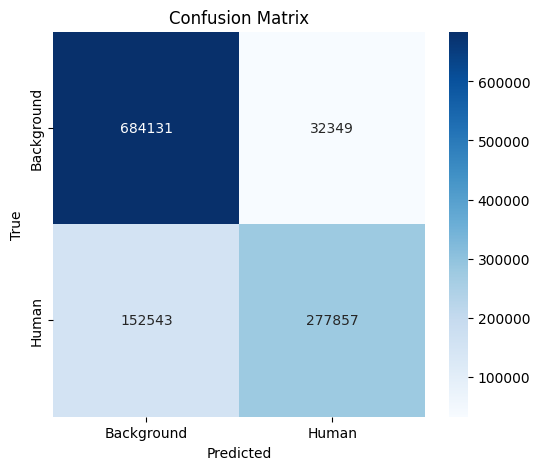

Intersection over Union (IoU): 0.6004


In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted the masks using your model
# Example: predictions = model.predict(val_img)
# Assuming the true masks (ground truth) are in `val_msk`

# Binarize predictions and true masks (since they are likely to be multi-class)
predictions_binary = (y_pred > 0.5).astype(int)  # Threshold the output
val_msk_binary = (test_msk > 0.5).astype(int)  # Assuming binary segmentation (flood/no flood), using test_msk as the ground truth for y_pred

# Confusion Matrix
cm = confusion_matrix(val_msk_binary.flatten(), predictions_binary.flatten())

# IoU calculation for each class
intersection = cm[1, 1]  # True positive (TP)
union = cm[1, 1] + cm[0, 1] + cm[1, 0]  # TP + false positives (FP) + false negatives (FN)
iou = intersection / union

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Human'], yticklabels=['Background', 'Human'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Output the IoU
print(f"Intersection over Union (IoU): {iou:.4f}")

# Method 2 - Applying Data Augmentation

In [73]:
def brightness(image,mask):
    img = tf.image.adjust_brightness(image, 0.1)
    return img,mask

def gamma(image,mask):
    img = tf.image.adjust_gamma(image, 0.1)
    return img,mask

def hue(image,mask):
    img = tf.image.adjust_hue(image, -0.1)
    return img,mask

In [74]:
def crop(image, mask):
    img = tf.image.central_crop(image,0.7)
    img = tf.image.resize(img, (128,128))
    mask = tf.image.central_crop(mask, 0.7)
    mask = tf.image.resize(mask, (128,128))
    return img, mask

def flip_horizontal(image,mask):
    img = tf.image.flip_left_right(image)
    mask = tf.image.flip_left_right(mask)
    return img, mask

def flip_vertical(image, mask):
    img = tf.image.flip_up_down(image)
    mask = tf.image.flip_up_down(mask)
    return img, mask

def rotate(image, mask):
    img = tf.image.rot90(image)
    mask = tf.image.rot90(mask)
    return img, mask

In [75]:
train_augmented = tf.data.Dataset.zip(X_train, y_train)

In [76]:
a = train_augmented.map(brightness)
b = train_augmented.map(gamma)
c = train_augmented.map(hue)
d = train_augmented.map(crop)
e = train_augmented.map(flip_horizontal)
f = train_augmented.map(flip_vertical)
g = train_augmented.map(rotate)

In [77]:
train_augmented = train_augmented.concatenate(a)
train_augmented = train_augmented.concatenate(b)
train_augmented = train_augmented.concatenate(c)
train_augmented = train_augmented.concatenate(d)
train_augmented = train_augmented.concatenate(e)
train_augmented = train_augmented.concatenate(f)

In [78]:
sample = list(train_augmented.as_numpy_iterator())
train_img_augmented = []
train_msk_augmented = []
for i,j in sample:
    train_img_augmented.append(i)
    train_msk_augmented.append(j)

In [79]:
train_img_augmented = np.array(train_img_augmented)
train_msk_augmented = np.array(train_msk_augmented)

In [80]:
train_img_augmented.shape

(1155, 128, 128, 3)

In [81]:
train_msk_augmented.shape

(1155, 128, 128, 1)

In [82]:
val_img.shape

(55, 128, 128, 3)

In [83]:
val_msk.shape

(55, 128, 128, 1)

## Fit the model

In [84]:
model_augmented = unet()

In [85]:
model_augmented.fit(train_img_augmented,
          train_msk_augmented,
          batch_size = 32,
          epochs=15,
          validation_data=(val_img,val_msk))

Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5836 - loss: 0.7242 - val_accuracy: 0.7591 - val_loss: 0.6911
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 392ms/step - accuracy: 0.7220 - loss: 0.6905 - val_accuracy: 0.7461 - val_loss: 0.6914
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 393ms/step - accuracy: 0.7172 - loss: 0.6914 - val_accuracy: 0.7461 - val_loss: 0.6905
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - accuracy: 0.7056 - loss: 0.6907 - val_accuracy: 0.7462 - val_loss: 0.6896
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 389ms/step - accuracy: 0.7224 - loss: 0.6897 - val_accuracy: 0.7477 - val_loss: 0.6887
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 392ms/step - accuracy: 0.7198 - loss: 0.6888 - val_accuracy: 0.7461 - val_loss: 0.6878
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - accuracy: 0.7159 - loss: 0.6882 - val_accuracy: 0.7461 - val_loss: 0.6869
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step - accuracy: 0.7139 - loss: 0.6875 - val_accurac

In [86]:
train_loss ,train_acc = model_augmented.evaluate(train_img_augmented,train_msk_augmented)
val_loss ,val_acc = model_augmented.evaluate(val_img,val_msk)
print("Training loss = %.2f" % train_loss)
print("Training accuracy = %.2f "% train_acc)

print("Validation loss = %.2f "%val_loss)
print("Validation accuracy = %.2f "% val_acc)

37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - accuracy: 0.7309 - loss: 0.6808
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7515 - loss: 0.6798
Training loss = 0.68
Training accuracy = 0.71 
Validation loss = 0.68 
Validation accuracy = 0.75 


In [87]:
test_img = [resize_image(i) for i in test_images]
test_img = np.array(test_img)
test_img.shape

(70, 128, 128, 3)

In [88]:
test_msk = [resize_mask(i) for i in test_masks]
test_msk = np.array(test_msk)
test_msk.shape

(70, 128, 128, 1)

In [89]:
y_pred = model_augmented.predict(test_img)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step


In [90]:
y_pred.shape

(70, 128, 128, 1)

## Visualizing the predictions

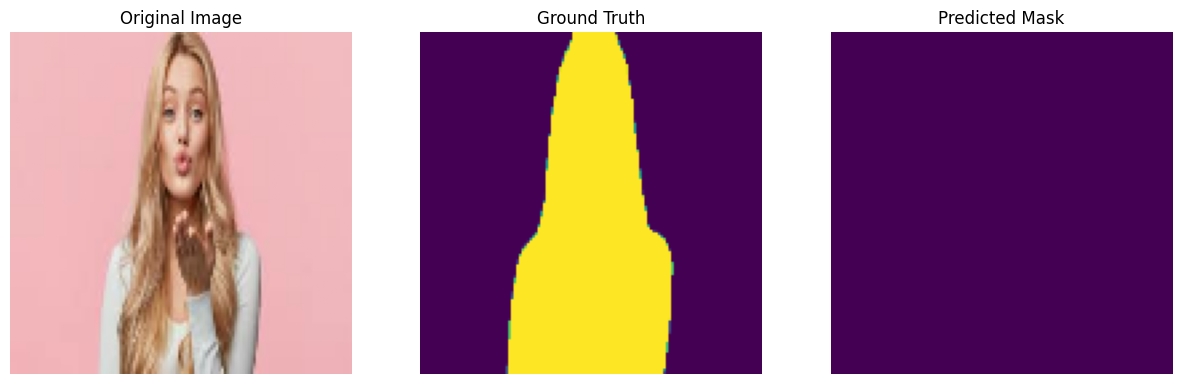

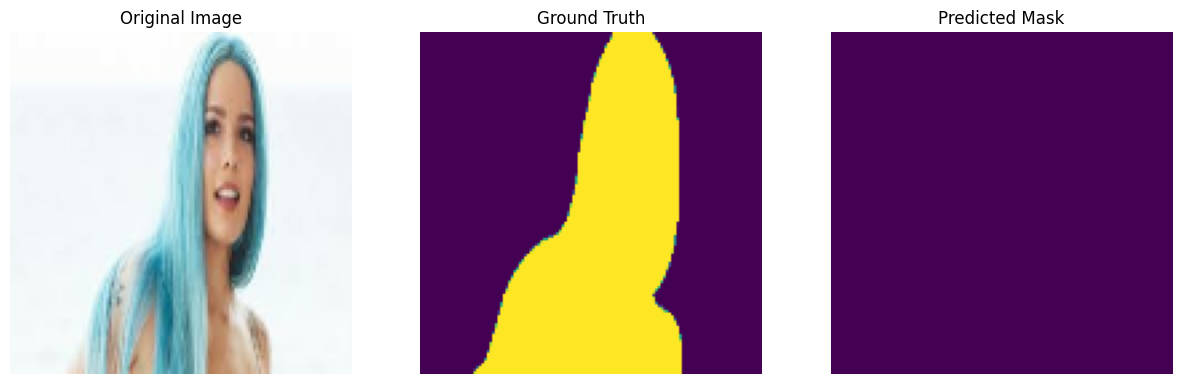

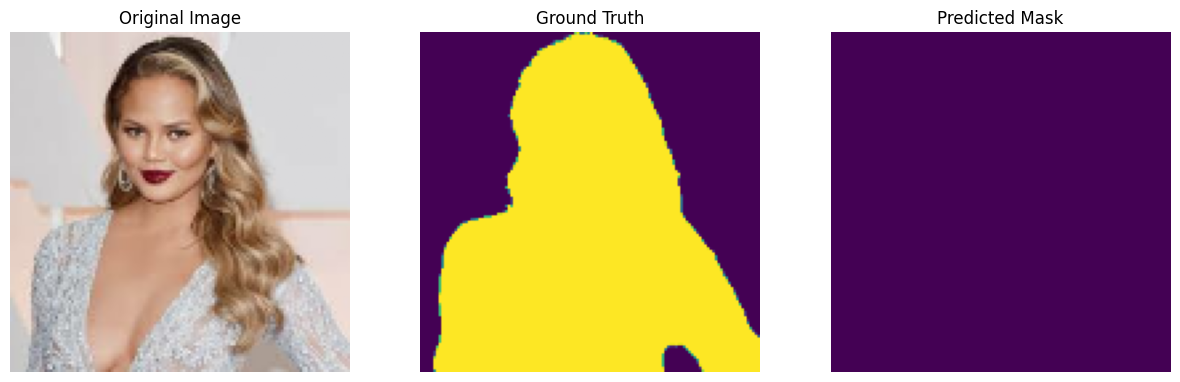

In [91]:
for i in range(3):

    plt.figure(figsize=(15,15))

    plt.subplot(i+1,3,1)
    plt.title("Original Image")
    plt.imshow(test_img[i])
    plt.axis(False)

    plt.subplot(i+1,3,2)
    plt.title("Ground Truth")
    plt.imshow(test_msk[i])
    plt.axis(False)

    plt.subplot(i+1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(tf.round(y_pred[i]))
    plt.axis(False)


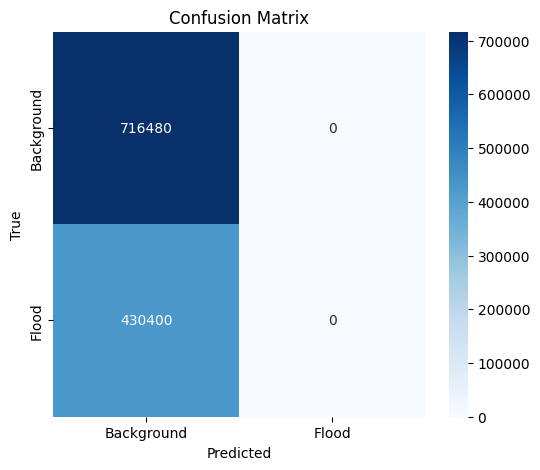

Intersection over Union (IoU): 0.0000


In [92]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted the masks using your model
# Example: predictions = model.predict(val_img)
# Assuming the true masks (ground truth) are in `val_msk`

# Binarize predictions and true masks (since they are likely to be multi-class)
predictions_binary = (y_pred > 0.5).astype(int)  # Threshold the output
val_msk_binary = (test_msk > 0.5).astype(int)  # Assuming binary segmentation (flood/no flood), using test_msk as the ground truth for y_pred

# Confusion Matrix
cm = confusion_matrix(val_msk_binary.flatten(), predictions_binary.flatten())

# IoU calculation for each class
intersection = cm[1, 1]  # True positive (TP)
union = cm[1, 1] + cm[0, 1] + cm[1, 0]  # TP + false positives (FP) + false negatives (FN)
iou = intersection / union

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Flood'], yticklabels=['Background', 'Flood'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Output the IoU
print(f"Intersection over Union (IoU): {iou:.4f}")

##Input image by user

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


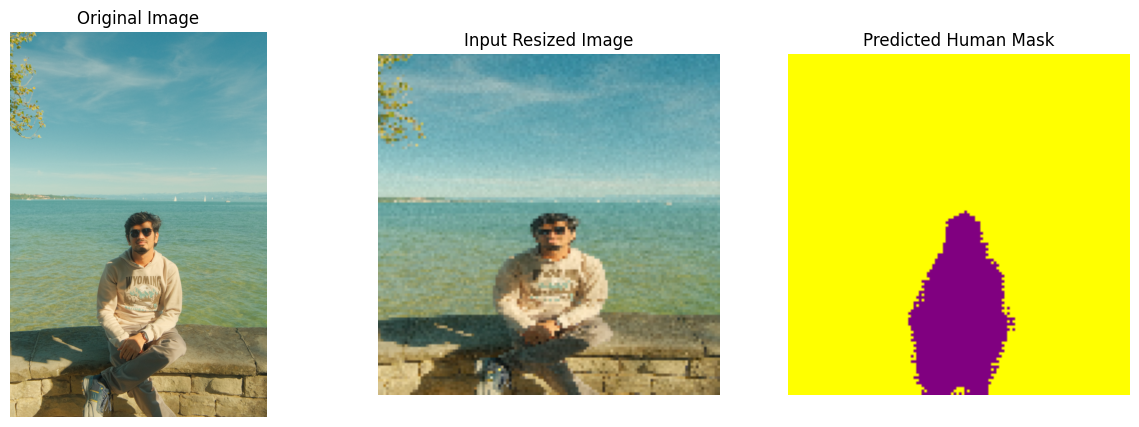

In [62]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def apply_yellow_purple_colormap(binary_mask):
    # Convert the binary mask to 3 channels (RGB)
    color_mask = np.zeros((binary_mask.shape[0], binary_mask.shape[1], 3), dtype=np.uint8)

    # Apply yellow to the predicted areas (flood areas)
    color_mask[np.squeeze(binary_mask) == 1] = [128, 0, 128]  # Yellow color for flood

    # Apply purple for non-flood areas (background)
    color_mask[np.squeeze(binary_mask) == 0] = [255, 255, 0]  # Purple color for background

    return color_mask

# Function to preprocess the image for prediction
def preprocess_image(img_path, target_size=(128, 128)):
    # Load the image from the path
    img = cv2.imread(img_path)
    if img is None: # Add a check here
        raise FileNotFoundError(f"Error: Image not found or could not be loaded from {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Resize the image to the target size used for training
    img_resized = cv2.resize(img, target_size)

    # Normalize the image (same as you did during training, e.g., scaling to [0, 1] range)
    img_normalized = img_resized / 255.0

    # Add batch dimension (needed for model prediction)
    img_batch = np.expand_dims(img_normalized, axis=0)

    return img_resized, img_batch # Return both for display later

# Function to predict the flood mask
def predict_flood_mask(model, img_path):
    # Preprocess the image
    img_resized, img_batch = preprocess_image(img_path) # Correctly unpack both values

    # Predict the flood mask using the trained model
    prediction = model_s.predict(img_batch)

    # If the prediction is a single class (binary), apply a color map to it
    # Binarize the prediction to flood/no flood (0 or 1)
    prediction_binary = (prediction[0] > 0.5).astype(np.uint8) # prediction[0] is used to remove batch dimension

    # Apply a colormap to the binary prediction to visualize it as a colored mask
    color_mask = apply_yellow_purple_colormap(prediction_binary)

    return img_resized, color_mask # Return both the resized image and the colored mask

# Function to display the input image and its predicted flood mask
def display_prediction(original_img_rgb, resized_img_for_model, predicted_mask):
    plt.figure(figsize=(15, 5)) # Adjusted figsize for 3 plots

    # Display the original image
    plt.subplot(1, 3, 1) # Changed to 1,3,1 for three plots
    plt.imshow(original_img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Display the resized image that was fed to the model
    plt.subplot(1, 3, 2) # Changed to 1,3,2
    plt.imshow(resized_img_for_model)
    plt.title("Input Resized Image")
    plt.axis('off')

    # Display the predicted mask (with color)
    plt.subplot(1, 3, 3) # Changed to 1,3,3
    plt.imshow(predicted_mask)
    plt.title("Predicted Human Mask")
    plt.axis('off')

    plt.show()

# Example usage:
# Specify the path to your input image (can be any random image)
img_path = '/content/drive/MyDrive/Colab Notebooks/Human-Segmentation-Data/DSCF3915.JPG'

# Load the original image first for display purposes
original_img = cv2.imread(img_path)
if original_img is None:
    raise FileNotFoundError(f"Error: Original image not found or could not be loaded from {img_path}")
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Make prediction on the image, getting both the resized input and the mask
img_resized_for_model, predicted_color_mask = predict_flood_mask(model_s, img_path) # Correctly unpack

# Display the input image and its predicted flood mask
display_prediction(original_img_rgb, img_resized_for_model, predicted_color_mask)